In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train=pd.read_csv("aug_train.csv")

In [3]:
train.shape

(19158, 14)

Let's have a look at the data.

In [4]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


1- We have lot of missing values.                                                                                
2- Data is of mixed type.                                                                                             
3- enrollee_id and city needs to be removed.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# EDA

In [6]:
train=train.drop(columns=['enrollee_id','city'],axis=1)

print(train.shape)

(19158, 12)


In [7]:
print(train.columns)

Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')


In [8]:
#numerical columns
num_col=train.select_dtypes(exclude='object').columns
print("These are the numerical columns: \n ",num_col)

#categorical columns
cat_col=train.select_dtypes(include='object').columns
print("These are the categorical columns: \n ",cat_col)

These are the numerical columns: 
  Index(['city_development_index', 'training_hours', 'target'], dtype='object')
These are the categorical columns: 
  Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')


#### Let's have a look at the numerical columns.

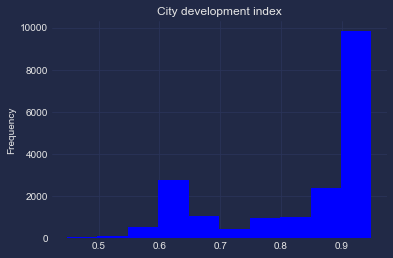

In [12]:
train['city_development_index'].plot(kind = 'hist',color="blue")
plt.ylabel("Frequency")
plt.title('City development index')
#sns.set_style("darkgrid")
plt.show()
#data is skewed to the left.......not a normal distribution

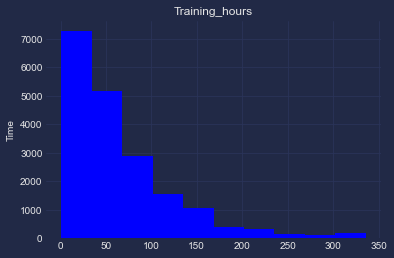

In [13]:
train['training_hours'].plot(kind = 'hist',color="blue")
plt.ylabel("Time")
plt.title('Training_hours')
plt.show()
#data is skewed to the right.......not a normal distribution
#Numerical variable are normally distributed. We could transform them to be gaussian like using power transform.

#### We will do Power transformation for the numeric data

In [38]:
!pip install mplcyberpunk

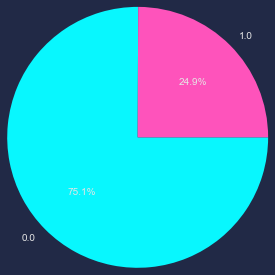

In [11]:
import mplcyberpunk
plt.style.use("cyberpunk")
data=train['target'].value_counts()
plt.pie(data,labels=data.index,autopct='%0.1f%%',radius=1.5,counterclock=False)
#plt.style.use('dark_background')
plt.show()
#It clearly shows that the data is imbalanced( in the ratio of 1:3)

C:\Users\Preeti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


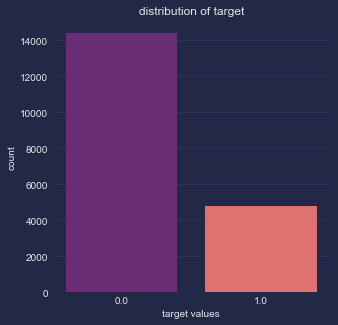

In [14]:
count = train['target'].value_counts()
plt.figure(figsize = (5,5))
sns.countplot(train.target,palette = 'magma')
plt.title('distribution of target')
plt.xlabel('target values')
plt.ylabel('count')
plt.show()

#### Now let's have a look at the categorical variables.

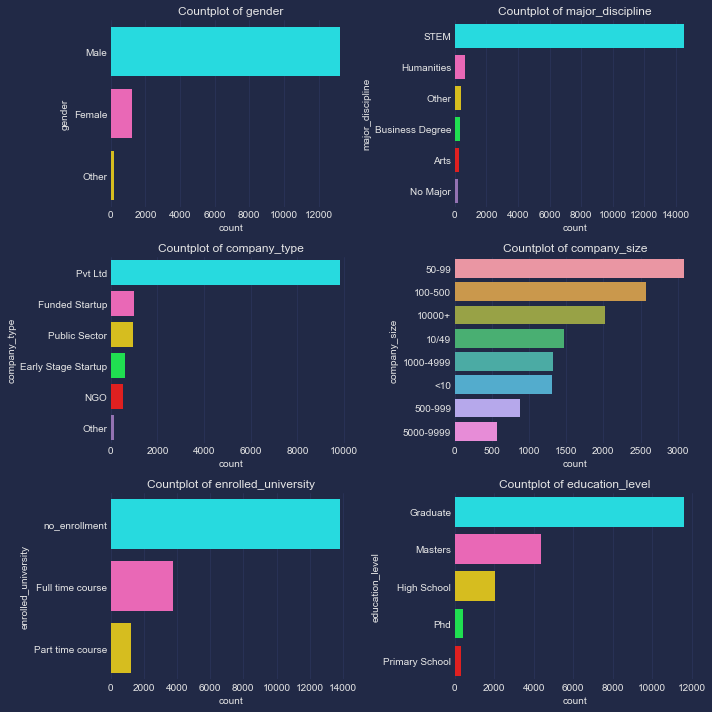

In [15]:
plt.figure(figsize=[10,10])

col=['gender','major_discipline','company_type','company_size','enrolled_university','education_level']
j=1

for i in col:
    plt.subplot(3,2,j)
    index =train[i].value_counts().index
    sns.countplot(y=train[i],order=index)
    sns.despine()
    plt.title("Countplot of {}".format(i))
    j=j+1
plt.tight_layout()

In general categorical features have one value in excess compared to other values 

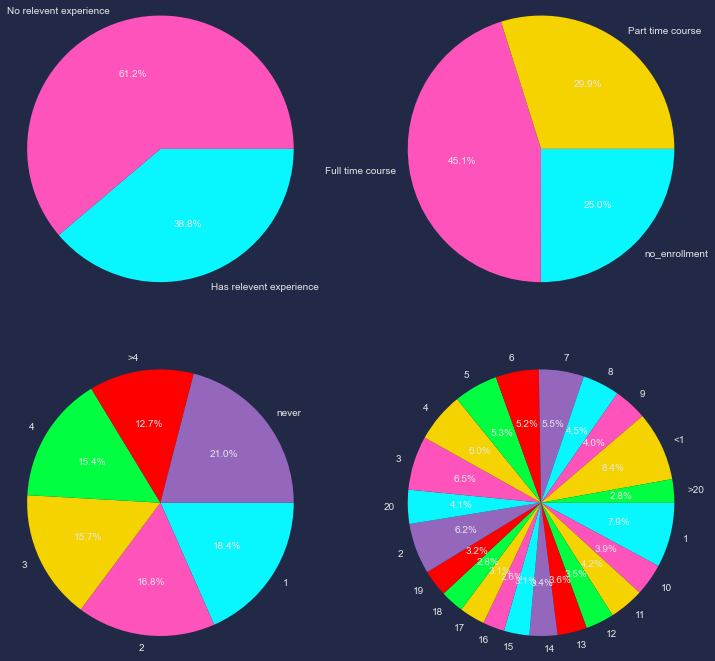

In [16]:
plt.figure(figsize=[10,10])

features=['relevent_experience','enrolled_university','last_new_job','experience']
n=1

for f in features:
    plt.subplot(2,2,n)
    
    data=100*train[train['target']==1][f].value_counts()/train[f].value_counts()
    plt.pie(data,labels=data.index,autopct='%0.1f%%',radius=1.3,counterclock=False)
    n=n+1
plt.tight_layout()

In [17]:
train.nunique()

city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             5
major_discipline            6
experience                 22
company_size                8
company_type                6
last_new_job                6
training_hours            241
target                      2
dtype: int64

In [18]:
train['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [19]:
train['experience'].replace({'<1':1,
                             '1':2,
                             '2':2,
                             '3':2,
                             '4':2,
                             '5':2,
                             '6':3,
                             '7':3,
                             '8':3,
                             '9':3,
                             '10':3,
                             '11':4,
                             '12':4,
                             '13':4,
                             '14':4,
                             '15':4,
                             '16':5,
                             '17':5,
                             '18':5,
                             '19':5,
                             '20':5,
                             '>20':6},inplace=True)

In [20]:
train['experience'].value_counts()

2.0    5863
3.0    5011
6.0    3286
4.0    2829
5.0    1582
1.0     522
Name: experience, dtype: int64

In [28]:
from sklearn.preprocessing import OneHotEncoder  

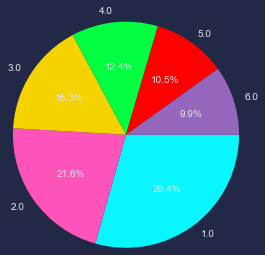

In [22]:
data=100*train[train['target']==1]['experience'].value_counts()/train['experience'].value_counts()
plt.pie(data,labels=data.index,autopct='%0.1f%%',radius=1.3,counterclock=False)
mplcyberpunk.add_glow_effects()
plt.show()

### Let see how many and what percentage of missing values are there.

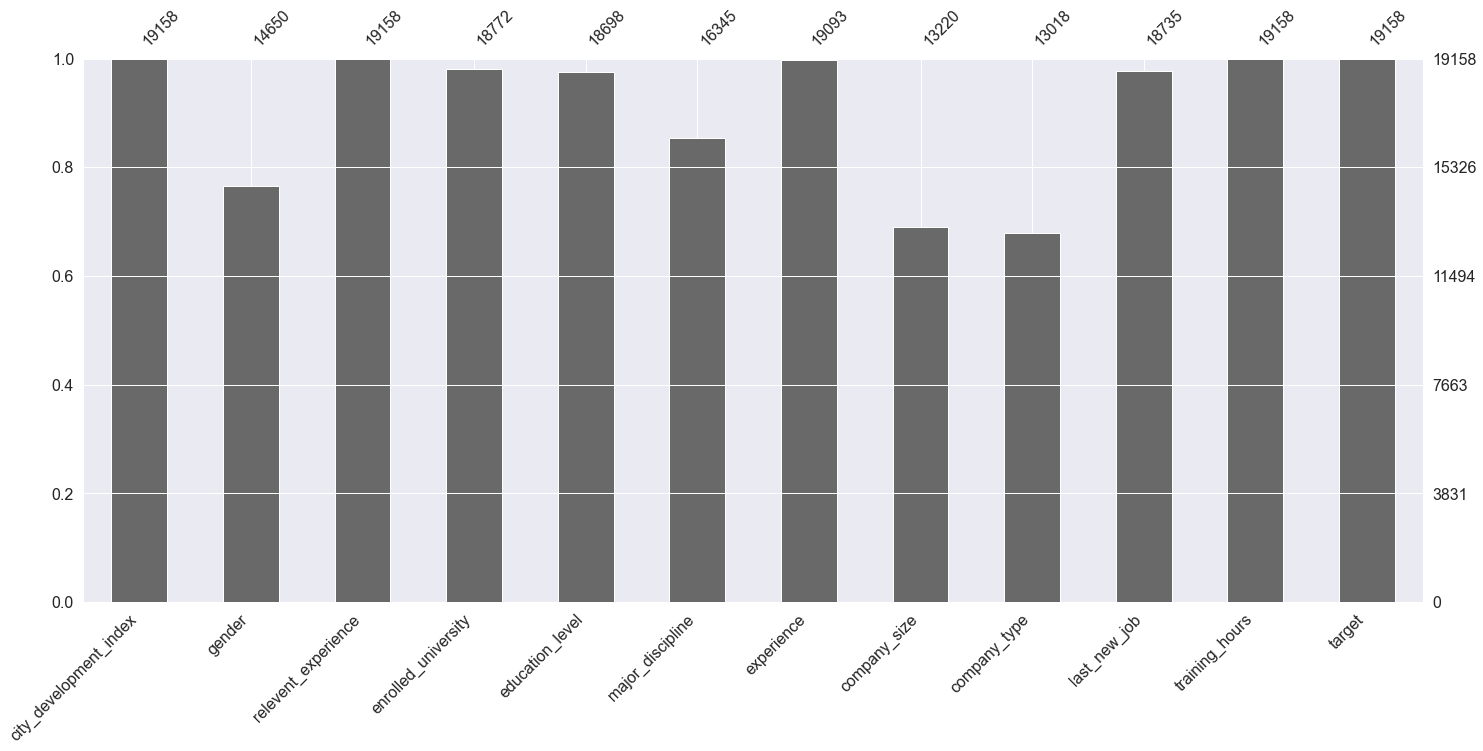

In [191]:
missingno.bar(train)
plt.show()

In [23]:
no_missing_data = train.dropna()
total_values = len(train)
no_missing_values = len(no_missing_data)
print('Total rows in the data:',total_values)
print('Number of rows that contain missing values:' ,  no_missing_values )
print('Percentage of rows that contains missing values:', 100*(no_missing_values ) / total_values )

Total rows in the data: 19158
Number of rows that contain missing values: 8955
Percentage of rows that contains missing values: 46.74287503914814


We have lot of missing data.......we will simply remove the columns that have more than 25% of missing values.

In [24]:
(train.isna().sum()*100)/len(train)

city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [23]:
ms_per = pd.DataFrame({'No of missing values':train.isnull().sum(),'Percentage of missing values':100*train.isnull().sum()/len(train)})
ms_per

,No of missing values,Percentage of missing values
city_development_index,0,0.000000
gender,4508,23.530640
relevent_experience,0,0.000000
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885
company_type,6140,32.049274
last_new_job,423,2.207955


In [24]:
ms_per[ms_per['No of missing values'] > 0]

,No of missing values,Percentage of missing values
gender,4508,23.530640
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885
company_type,6140,32.049274
last_new_job,423,2.207955


1- We need to handle the null values.                                                                                  
2- Do label encoding/one hot encoding for categorical variables.                                                         
3- Do power transformation for numerical variables.                                                                         
3- We will oversampling as target is imbalanced.

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder,PowerTransformer,MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split

In [26]:
train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,6.0,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,4.0,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,2.0,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,6.0,50-99,Funded Startup,4,8,0.0


In [33]:
col=["gender","enrolled_university","relevent_experience","education_level","major_discipline","company_size","company_type","last_new_job"]
#only eight col and not nine as we have already converted experience in the desired format.

enc = OneHotEncoder(handle_unknown='ignore')
train1 = pd.DataFrame(enc.fit_transform(train[["gender","enrolled_university","relevent_experience","education_level","major_discipline","company_size","company_type","last_new_job" ]]).toarray())

#train1 = pd.get_dummies(train, columns=col,drop_first=True)

#test = pd.get_dummies(test, columns=["gender","enrolled_university","relevent_experience","education_level","major_discipline","company_size","company_type"],drop_first=True)

TypeError: fit() got an unexpected keyword argument 'drop_first'

In [32]:
train1.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   city_development_index                      19158 non-null  float64
 1   experience                                  19093 non-null  float64
 2   training_hours                              19158 non-null  int64  
 3   target                                      19158 non-null  float64
 4   gender_Male                                 19158 non-null  uint8  
 5   gender_Other                                19158 non-null  uint8  
 6   enrolled_university_Part time course        19158 non-null  uint8  
 7   enrolled_university_no_enrollment           19158 non-null  uint8  
 8   relevent_experience_No relevent experience  19158 non-null  uint8  
 9   education_level_High School                 19158 non-null  uint8  
 10  education_

In [61]:
print(train1.columns)

Index(['city_development_index', 'experience', 'training_hours', 'target',
       'gender_Male', 'gender_Other', 'enrolled_university_Part time course',
       'enrolled_university_no_enrollment',
       'relevent_experience_No relevent experience',
       'education_level_High School', 'education_level_Masters',
       'education_level_Phd', 'education_level_Primary School',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'company_size_100-500',
       'company_size_1000-4999', 'company_size_10000+', 'company_size_50-99',
       'company_size_500-999', 'company_size_5000-9999', 'company_size_<10',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd', 'last_new_job_2',
       'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
       'last_new_job_never'],
      dtype='object')


In [26]:
model = LinearRegression()

mice_imputer = IterativeImputer(random_state=42, estimator=model, max_iter=10,
                         n_nearest_features=2,skip_complete=True)
final_df = mice_imputer.fit_transform(train1)

final_df = pd.DataFrame(final_df)
print(final_df.shape)
final_df.columns = ['city_development_index', 'experience', 'training_hours', 'target',
                   'gender_Male', 'gender_Other', 'enrolled_university_Part time course',
                   'enrolled_university_no_enrollment',
                   'relevent_experience_No relevent experience',
                   'education_level_High School', 'education_level_Masters',
                   'education_level_Phd', 'education_level_Primary School',
                   'major_discipline_Business Degree', 'major_discipline_Humanities',
                   'major_discipline_No Major', 'major_discipline_Other',
                   'major_discipline_STEM', 'company_size_100-500',
                   'company_size_1000-4999', 'company_size_10000+', 'company_size_50-99',
                   'company_size_500-999', 'company_size_5000-9999', 'company_size_<10',
                   'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
                   'company_type_Public Sector', 'company_type_Pvt Ltd', 'last_new_job_2',
                   'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
                   'last_new_job_never']

(19158, 35)


C:\Users\Preeti\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [27]:
final_df.head()

,city_development_index,experience,training_hours,target,gender_Male,gender_Other,enrolled_university_Part time course,enrolled_university_no_enrollment,relevent_experience_No relevent experience,education_level_High School,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,6.0,36.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.776,4.0,47.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.624,2.0,83.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.789,1.0,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.767,6.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
num_col = ['city_development_index','training_hours']
transform=PowerTransformer()

df1=transform.fit_transform(final_df[num_col])
df1 = pd.DataFrame(df1)

In [29]:
df1.head()

,0,1
0,0.826988,-0.267123
1,-0.874462,0.009220
2,-1.527335,0.639156
3,-0.779066,0.117143
4,-0.935671,-1.601817


In [30]:
df1.columns = ['city_development_index', 'training_hours']
df1.head()

,city_development_index,training_hours
0,0.826988,-0.267123
1,-0.874462,0.009220
2,-1.527335,0.639156
3,-0.779066,0.117143
4,-0.935671,-1.601817


In [31]:
final_df.drop(['city_development_index', 'training_hours'], inplace=True, axis=1)

In [32]:
frames=[df1,final_df]
df = pd.concat(frames, axis=1)
df.head()

,city_development_index,training_hours,experience,target,gender_Male,gender_Other,enrolled_university_Part time course,enrolled_university_no_enrollment,relevent_experience_No relevent experience,education_level_High School,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.826988,-0.267123,6.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.874462,0.009220,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-1.527335,0.639156,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.779066,0.117143,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.935671,-1.601817,6.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
y = df["target"]
X = final_df.drop('target',1)

In [36]:
X.head()

,experience,gender_Male,gender_Other,enrolled_university_Part time course,enrolled_university_no_enrollment,relevent_experience_No relevent experience,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,6.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE,ADASYN, SVMSMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [38]:
svm_smote = SMOTE( random_state=42,k_neighbors=5) 
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X,y)

X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.3, random_state=42)

In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_svm)

In [40]:
X_test = sc.transform(X_test_svm)
print("Number of data points in train data :",X_train.shape)
print("Number of data points in validation data :",X_test.shape)
print(X_train.mean())

Number of data points in train data : (20133, 32)
Number of data points in validation data : (8629, 32)
2.895083136781439e-17


0.0    14381
1.0    14381
Name: target, dtype: int64


C:\Users\Preeti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

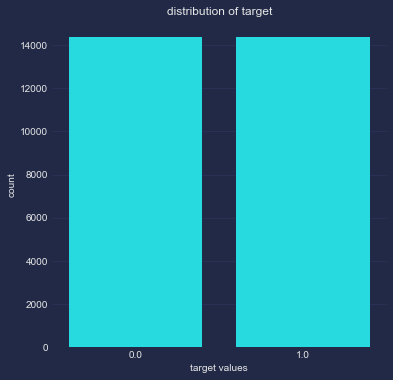

In [63]:
count = y_svm_smote.value_counts()
print( count )
plt.figure(figsize = (6,6))
sns.countplot(y_svm_smote,color = sns.color_palette()[0])
plt.title('distribution of target')
plt.xlabel('target values')
plt.ylabel('count')

In [42]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (20133, 32)
X_test (8629, 32)
y_train (20133,)
y_test (8629,)


# Model prediction

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression



In [44]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
lr = LogisticRegression()

In [45]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7575617105110674

In [46]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.740062579673195

In [47]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.6634604241511183

In [49]:
parameters={'n_estimators':range(150,300,50),
            'max_features':[0.4,0.5,0.6,0.7,0.8]}

In [50]:

cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

grid=GridSearchCV(rf,parameters,scoring='roc_auc',cv=cv,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [0.4, 0.5, 0.6, 0.7, 0.8],
                         'n_estimators': range(150, 300, 50)},
             scoring='roc_auc')

In [51]:
print(grid.best_score_)

0.8233415337135861


In [ ]:
inter=Pipeline([('i',SimpleImputer(strategy='most_frequent')),
                ('e',OneHotEncoder()),
                ('fs',SelectKBest(score_func=chi2,k=23))])
              
transformers=[('t',PowerTransformer(),num),
              ('inter',inter,cat)]
    
steps=[('pre',ColumnTransformer(transformers=transformers)),
       ('sampling',SMOTE( random_state=42,k_neighbors=5)),
       ('model',RandomForestClassifier(**params))]

In [53]:
from sklearn.compose import ColumnTransformer

In [ ]:
transformer = ColumnTransformer(transformer=[
    ('tnf1',IterativeImputer(estimator=LinearRegression(), max_iter=10,n_nearest_features=2,skip_complete=True),['city_development_index', 'experience', 
                   'training_hours', 'target',
                   'gender_Male', 'gender_Other', 'enrolled_university_Part time course',
                   'enrolled_university_no_enrollment',
                   'relevent_experience_No relevent experience',
                   'education_level_High School', 'education_level_Masters',
                   'education_level_Phd', 'education_level_Primary School',
                   'major_discipline_Business Degree', 'major_discipline_Humanities',
                   'major_discipline_No Major', 'major_discipline_Other',
                   'major_discipline_STEM', 'company_size_100-500',
                   'company_size_1000-4999', 'company_size_10000+', 'company_size_50-99',
                   'company_size_500-999', 'company_size_5000-9999', 'company_size_<10',
                   'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
                   'company_type_Public Sector', 'company_type_Pvt Ltd', 'last_new_job_2',
                   'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
                   'last_new_job_never'] ),
    ()
])